<a href="https://colab.research.google.com/github/pagaspandhutanoyo/TA2STREAMLIT/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
pip install PyStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyStemmer: filename=PyStemmer-2.2.0.1-cp310-cp310-linux_x86_64.whl size=584851 sha256=f1a65bdc1b57090f5d1871d25906f56f85500b634f982da3ed3d2046b52bd866
  Stored in directory: /root/.cache/pip/wheels/45/7d/2c/a7ebb8319e01acc5306fa1f8558bf24063d6cec2c02de330c9
Successfully built PyStemmer


In [ ]:
pip install estimator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for estimator: filename=estimator-0.0.10-py3-none-any.whl size=7618 sha256=ac9b42eaf606d7baef9122936f0becd599368b36eedbb4e27cdac297aac59e19
  Stored in directory: /root/.cache/pip/wheels/d2/d9/f0/eae8ee2104067211eddc01b8b2d141d6ef20bc53a617f6ead2
Successfully built estimator


**PREPROSESING**

In [ ]:
# Mengimpor library untuk preprocessing data
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import csv
import pandas as pd
import numpy as np
import string
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
pd.set_option('display.max_colwidth',100)


In [ ]:
#Membuat fungsi load_data untuk membuka file csv hasil crawling data
def load_data():
    data = pd.read_csv('Kominfo22.csv',encoding='ISO-8859-1')
    return data

In [ ]:
#Memasukkan kedalam variabel
tweet_df = load_data()
#Menampilkan 500 data teratas
tweet_df.head(500)

,id,created_at,date,time,user_id,username,name,tweet,Label
0,1.620000e+18,2023-01-22 14:37:07 UTC,22-01-23,14:37:07,1.530000e+18,stefanantonio__,panggil aja || Mas Steff,@foururd @kemkominfo @donnybu @lantip @mataharitimoer Tapi bukankah setelah pendaftaran ulang k...,Positif
1,1.620000e+18,2023-01-23 06:55:22 UTC,23-01-23,6:55:22,1.530000e+18,stefanantonio__,panggil aja || Mas Steff,"@kemkominfo Sejak diwajibkannya PSE registrasi ulang, Kominfo itu punya otoritas atau bekerja s...",Positif
2,1.620000e+18,2023-02-03 02:08:55 UTC,03-02-23,2:08:55,1.420000e+18,anjimenation,anjimeNation,"pse kominfo kah? kalau iya, beda. krn pse lebih ke persetujuan aplikasi di negara. tapi yang m...",Positif
3,1.620000e+18,2023-02-03 09:44:54 UTC,03-02-23,9:44:54,1.460000e+18,sulfonilklorida,klo ??,"UU terupdate yg mendekati PDP (perlindungan data pribadi) itu, peraturan menteri kominfo soal P...",Positif
4,1.620000e+18,2023-01-18 16:04:36 UTC,18-01-23,16:04:36,8.380000e+17,hisar_sihotang,Hisar Sihotang,@PseKominfo Apa saja program APTIKA,Positif
...,...,...,...,...,...,...,...,...,...
495,1.620000e+18,2023-02-03 15:52:43 UTC,03-02-23,15:52:43,1.450000e+18,xeraake,????????,@hyang_wisnu @kemkominfo @jokowi @PlateJohnny Makin meningkat makin bagus @PlateJohnny @kemkominfo,Positif
496,1.620000e+18,2023-02-03 15:52:03 UTC,03-02-23,15:52:03,1.450000e+18,xeraake,????????,@hyang_wisnu @kemkominfo @jokowi @setkabgoid @PlateJohnny Pos Indonesia semakin berkembang @Plat...,Positif
497,1.620000e+18,2023-02-03 15:48:52 UTC,03-02-23,15:48:52,1.450000e+18,xeraake,????????,@hyang_wisnu @kemkominfo @jokowi @PlateJohnny @setkabgoid @KemensetnegRI @denni_sauya Wih keren ...,Positif
498,1.620000e+18,2023-02-03 15:38:04 UTC,03-02-23,15:38:04,1.450000e+18,rani_yurama,Rani,@hyang_wisnu @kemkominfo @jokowi @setkabgoid @PlateJohnny @KemensetnegRI Indeks keamanan terus d...,Positif


In [ ]:
#Mneghitung jumlah sentimen
tweet_df["Label"].value_counts()

Positif    1307
Negatif     743
Name: Label, dtype: int64

In [ ]:
#Mengecek informasi pada kolom dataframe
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2050 non-null   float64
 1   created_at  2050 non-null   object 
 2   date        2050 non-null   object 
 3   time        2050 non-null   object 
 4   user_id     2050 non-null   float64
 5   username    2050 non-null   object 
 6   name        2050 non-null   object 
 7   tweet       2050 non-null   object 
 8   Label       2050 non-null   object 
dtypes: float64(2), object(7)
memory usage: 144.3+ KB


In [ ]:
#Membuat datagrame baru yang terdiri dari kolom tweet dan sentimen saja
df = pd.DataFrame(tweet_df[['tweet', 'Label']])

# CASE FLODING

In [ ]:
#Tahapan Cleansing dan casefolding

# Menampilkan semua tanda baca dalam bentuk string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df['tweet'] = df.iloc[:,0].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df.head(10)

,tweet,Label
0,@foururd @kemkominfo @donnybu @lantip @mataharitimoer tapi bukankah setelah pendaftaran ulang ke...,Positif
1,"@kemkominfo sejak diwajibkannya pse registrasi ulang, kominfo itu punya otoritas atau bekerja sa...",Positif
2,"pse kominfo kah? kalau iya, beda. krn pse lebih ke persetujuan aplikasi di negara. tapi yang mas...",Positif
3,"uu terupdate yg mendekati pdp (perlindungan data pribadi) itu, peraturan menteri kominfo soal ps...",Positif
4,@psekominfo apa saja program aptika,Positif
5,ppob nusantara sudah terdaftar di bssn sebagai kategorisasi sistem elektronik (ket.538/bssn/d1/p...,Positif
6,idealnya @antara_lkbn @kumparan @detikcom dan media berita online lainnya ada kolom khusus umkm ...,Positif
7,@hyang_wisnu @kemkominfo @jokowi @platejohnny @setkabgoid program literasi digital harus tepat s...,Positif
8,@hyang_wisnu @kemkominfo @platejohnny @jokowi kabar gembira nih @platejohnny @kemkominfo,Positif
9,@hyang_wisnu @kemkominfo @platejohnny edukasi untuk masyarakat @platejohnny @kemkominfo,Positif


In [ ]:
#Membersihkan emoji
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

df['tweet'] = df['tweet'].apply(lambda x: emoji(x))
df.head()

,tweet,Label
0,@foururd @kemkominfo @donnybu @lantip @mataharitimoer tapi bukankah setelah pendaftaran ulang ke...,Positif
1,"@kemkominfo sejak diwajibkannya pse registrasi ulang, kominfo itu punya otoritas atau bekerja sa...",Positif
2,"pse kominfo kah? kalau iya, beda. krn pse lebih ke persetujuan aplikasi di negara. tapi yang mas...",Positif
3,"uu terupdate yg mendekati pdp (perlindungan data pribadi) itu, peraturan menteri kominfo soal ps...",Positif
4,@psekominfo apa saja program aptika,Positif


# **ClEANING DATA**

In [ ]:
def Cleaning(tweet):
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;)
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space

    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove mentions
    tweet = re.sub(r'#[A-Za-z0-9]+', '', tweet)                       # remove hashtag
    tweet = re.sub(r'RT[\s]', '', tweet)                              # remove RT
    tweet = re.sub(r"http\S+", '', tweet)                             # remove link
    tweet = re.sub(r'[0-9]+', '', tweet)                              # remove numbers

    tweet = tweet.replace('\n', ' ')                                  # replace new line into space
    tweet = tweet.replace('kemkominfo+','')
    tweet = tweet.replace('djaipse+','')
    tweet = tweet.replace('PlateJohnny+','')
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    tweet = tweet.strip(' ')                                          # remove characters space from both left and right text
    return tweet
df['tweet'] = df['tweet'].apply(lambda x: Cleaning(x))
df.head()

,tweet,Label
0,tapi bukankah setelah pendaftaran ulang kemarin pse ke kominfo kominfo punya power lebih besar y...,Positif
1,sejak diwajibkannya pse registrasi ulang kominfo itu punya otoritas atau bekerja sama paling tid...,Positif
2,pse kominfo kah kalau iya beda krn pse lebih ke persetujuan aplikasi di negara tapi yang masalah...,Positif
3,uu terupdate yg mendekati pdp perlindungan data pribadi itu peraturan menteri kominfo soal pse y...,Positif
4,apa saja program aptika,Positif


In [ ]:
#Menghilangkan duplikat pada tweet
df = df.reset_index(drop=True).drop_duplicates(subset='tweet', keep="last", ignore_index=True)
df

,tweet,Label
0,tapi bukankah setelah pendaftaran ulang kemarin pse ke kominfo kominfo punya power lebih besar y...,Positif
1,sejak diwajibkannya pse registrasi ulang kominfo itu punya otoritas atau bekerja sama paling tid...,Positif
2,pse kominfo kah kalau iya beda krn pse lebih ke persetujuan aplikasi di negara tapi yang masalah...,Positif
3,uu terupdate yg mendekati pdp perlindungan data pribadi itu peraturan menteri kominfo soal pse y...,Positif
4,apa saja program aptika,Positif
...,...,...
1963,siapa engineer nya ini kok bisanya saling mengganggu itu bts asal kejar oa dana cair yaa,Negatif
1964,kita hanya bisa bermimpi bang jika berani memblokir judi slot karena itu sesuatu hal yang tidak ...,Negatif
1965,iya sapa lagi yang bayar untuk karaokemassage plus plus dan party serta istri muda kalau bukan d...,Negatif
1966,mulai marak kembali link sambo,Negatif


In [ ]:
#Menyimpan dataframe
df.to_csv("Data-hasil-cleansing-casefolding.csv",encoding='utf-8',index=False)

In [ ]:
#Mengimpor kembali dataframe hasil cleansing diatas
data2 = pd.read_csv('Data-hasil-cleansing-casefolding.csv',encoding='ISO-8859-1')
data2

,tweet,Label
0,tapi bukankah setelah pendaftaran ulang kemarin pse ke kominfo kominfo punya power lebih besar y...,Positif
1,sejak diwajibkannya pse registrasi ulang kominfo itu punya otoritas atau bekerja sama paling tid...,Positif
2,pse kominfo kah kalau iya beda krn pse lebih ke persetujuan aplikasi di negara tapi yang masalah...,Positif
3,uu terupdate yg mendekati pdp perlindungan data pribadi itu peraturan menteri kominfo soal pse y...,Positif
4,apa saja program aptika,Positif
...,...,...
1963,siapa engineer nya ini kok bisanya saling mengganggu itu bts asal kejar oa dana cair yaa,Negatif
1964,kita hanya bisa bermimpi bang jika berani memblokir judi slot karena itu sesuatu hal yang tidak ...,Negatif
1965,iya sapa lagi yang bayar untuk karaokemassage plus plus dan party serta istri muda kalau bukan d...,Negatif
1966,mulai marak kembali link sambo,Negatif


# **Tokenization**

In [ ]:
# Membuat fungsi tokenization untuk memisahkan kalimat menjadi kata
def tokenization(Tweets):
  Tweets = re.split('\W+', Tweets)
  return Tweets

#Menerapkan function pada kolom tweet
data2['tweet'] = data2['tweet'].apply(lambda x: tokenization(str(x).lower()))
#Menampilkan 50 data teratas
data2.head(50)

,tweet,Label
0,"[tapi, bukankah, setelah, pendaftaran, ulang, kemarin, pse, ke, kominfo, kominfo, punya, power, ...",Positif
1,"[sejak, diwajibkannya, pse, registrasi, ulang, kominfo, itu, punya, otoritas, atau, bekerja, sam...",Positif
2,"[pse, kominfo, kah, kalau, iya, beda, krn, pse, lebih, ke, persetujuan, aplikasi, di, negara, ta...",Positif
3,"[uu, terupdate, yg, mendekati, pdp, perlindungan, data, pribadi, itu, peraturan, menteri, kominf...",Positif
4,"[apa, saja, program, aptika]",Positif
5,"[ppob, nusantara, sudah, terdaftar, di, bssn, sebagai, kategorisasi, sistem, elektronik, ket, bs...",Positif
6,"[idealnya, dan, media, berita, online, lainnya, ada, kolom, khusus, umkm, dan, usaha, kreatif, i...",Positif
7,"[program, literasi, digital, harus, tepat, sasaran]",Positif
8,"[kabar, gembira, nih]",Positif
9,"[edukasi, untuk, masyarakat]",Positif


In [ ]:
#Menyimpan dataset hasil tokenizing
data2.to_csv("Data-hasil-tokenization.csv",encoding='utf-8',index=False)

In [ ]:
#TAHAPAN MEMULAI NORMALISASI
#Normalisasi kata adalah sebuah tahapan untuk mengubah bentuk suatu kata yang tidak baku dalam suatu kalimat pada tweet menjadi suatu kata yang baku dalam suatu kalimat.

normalizad_word = pd.read_csv("new_kamusalay.csv", encoding='ISO-8859-1')

#Membuat dictionary
normalizad_word_dict = {}

#Melakukan perulangan dan pengecekan pada tiap baris dataset
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

#Melakukan normalisasi
def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

#Menggunakan function normalisasi ke kolom tweet
data2['tweet'] = data2['tweet'].apply(normalized_term)
#Menampilkan 100 data teratas
data2['tweet'].head(100)

0     [tapi, bukankah, setelah, pendaftaran, ulang, kemarin, pse, ke, kominfo, kominfo, punya, power, ...
1     [sejak, diwajibkannya, pse, registrasi, ulang, kominfo, itu, punya, otoritas, atau, bekerja, sam...
2     [pse, kominfo, kah, kalau, iya, beda, karena, pse, lebih, ke, persetujuan, aplikasi, di, negara,...
3     [undang undang, terbaru, yang, mendekati, pdp, perlindungan, data, pribadi, itu, peraturan, ment...
4                                                                            [apa, saja, program, aptika]
                                                     ...                                                 
95                                                   [sudah, keharusan, bagi, menghapus, data, pelanggan]
96                                                                [wilayah, lain, akan, segera, menyusul]
97                                                        [paling, tidak, anakanak, paham, dasardasarnya]
98    [pemahaman, tentang, kripto, perlu, dila

**STOPWORD REMOVAL**

In [ ]:
# #STOPWORD

# #Membuat fungsi stopword untuk menghilangkan kata yang tidak perlu /tidak ada makna
# def stopwords(Tweets):
#   reg = re.compile(r"\n")
#   return reg.split(Tweets)

# # Membuka file contoh stopword
# file = open("stopwords.txt","r");
# st = file.read()
# stopwords = stopwords(st)
# stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# # Membuat fungsi menghapus stopword untuk mengilangkan stopword pada tweet berdasarkan contoh diatas
# def remove_stopwords(Tweets):
#   Tweets = [word for word in Tweets if word not in stopwords]
#   return Tweets

# #Menerapkan fungsi pada tweet
# data2['tweet'] = data2['tweet'].apply(lambda x: remove_stopwords(x))
# #Menampilkan 50 data teratas
# data2.head(50)

,tweet,Label
0,"[pendaftaran, ulang, kemarin, pse, kominfo, kominfo, power, ya, pse, indonesia, memahami, cultur...",Positif
1,"[diwajibkannya, pse, registrasi, ulang, kominfo, otoritas, mengatur, pse, beroperasi, indonesia,...",Positif
2,"[pse, kominfo, kah, iya, beda, pse, persetujuan, aplikasi, negara, aplikasi, berbagi, gratis, ta...",Positif
3,"[undang undang, terbaru, mendekati, pdp, perlindungan, data, pribadi, peraturan, menteri, kominf...",Positif
4,"[program, aptika]",Positif
5,"[ppob, nusantara, terdaftar, bssn, kategorisasi, sistem, elektronik, ket, bssn, pp, ppob, nusant...",Positif
6,"[idealnya, media, berita, online, kolom, khusus, usaha mikro kecil dan menengah, usaha, kreatif,...",Positif
7,"[program, literasi, digital, sasaran]",Positif
8,"[kabar, gembira, nih]",Positif
9,"[edukasi, masyarakat]",Positif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1968 non-null   object
 1   Label   1968 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


In [ ]:
#Menghitung kembali jumlah sentimen
data2["Label"].value_counts()

Positif    1233
Negatif     735
Name: Label, dtype: int64

In [ ]:
#Menyimpan dataset
data2.to_csv("Data-hasil-Normal.csv",encoding='utf-8',index=False)

# STEAAMING

In [ ]:
#Membuat fungsi load_data untuk membuka file csv hasil stopword
def load_data():
  data = pd.read_csv('Data-hasil-Normal.csv',encoding='ISO-8859-1')

  return data

In [ ]:
#Memasukkan kedalam variabel tweet_df
tweet_df = load_data()
#Menampilkan 100 data teratas
tweet_df.head(100)

,tweet,Label
0,"['tapi', 'bukankah', 'setelah', 'pendaftaran', 'ulang', 'kemarin', 'pse', 'ke', 'kominfo', 'komi...",Positif
1,"['sejak', 'diwajibkannya', 'pse', 'registrasi', 'ulang', 'kominfo', 'itu', 'punya', 'otoritas', ...",Positif
2,"['pse', 'kominfo', 'kah', 'kalau', 'iya', 'beda', 'karena', 'pse', 'lebih', 'ke', 'persetujuan',...",Positif
3,"['undang undang', 'terbaru', 'yang', 'mendekati', 'pdp', 'perlindungan', 'data', 'pribadi', 'itu...",Positif
4,"['apa', 'saja', 'program', 'aptika']",Positif
...,...,...
95,"['sudah', 'keharusan', 'bagi', 'menghapus', 'data', 'pelanggan']",Positif
96,"['wilayah', 'lain', 'akan', 'segera', 'menyusul']",Positif
97,"['paling', 'tidak', 'anakanak', 'paham', 'dasardasarnya']",Positif
98,"['pemahaman', 'tentang', 'kripto', 'perlu', 'dilakukan', 'karena', 'masih', 'dianggap', 'negatif...",Positif


In [ ]:
#Mengecek jumlah kolom dan tipedata
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1968 non-null   object
 1   Label   1968 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
tweet_df['tweet'] = tweet_df['tweet'][:].apply(lambda x: " ".join([stemmer.stem(word) for word in str(x).split()]))
tweet_df.head(10)

,tweet,Label
0,tapi bukankah telah daftar ulang kemarin pse ke kominfo kominfo punya power lebih besar ya hadap...,Positif
1,sejak wajib pse registrasi ulang kominfo itu punya otoritas atau kerja sama paling tidak untuk a...,Positif
2,pse kominfo kah kalau iya beda karena pse lebih ke tuju aplikasi di negara tapi yang masalah ini...,Positif
3,undang undang baru yang dekat pdp lindung data pribadi itu atur menteri kominfo soal pse yang se...,Positif
4,apa saja program aptika,Positif
5,ppob nusantara sudah daftar di bssn bagai kategorisasi sistem elektronik ket bssn pp ppob nusant...,Positif
6,ideal dan media berita online lain ada kolom khusus usaha mikro kecil dan tengah dan usaha kreat...,Positif
7,program literasi digital harus tepat sasar,Positif
8,kabar gembira nih,Positif
9,edukasi untuk masyarakat,Positif


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['kominfo', 'Kominfo','hai', 'sih', 'nih', 'yg', 'kak', 'ni', 'jd', 'walopun','tuh','nomor', 'tanda', 'daftar', 'djaipse','johnny', 'plate','min','mentri']

stopword = stop_factory + more_stopword

In [ ]:
#STEMMING

#Membuat fungsi stemming untuk menghilangkan imbuhan dan kembali ke kata dasar
def stemmingIndo(Tweets):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(Tweets)

#Menggunakan fungsi ke kolom tweet
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: stemmingIndo(x.lower()))
tweet_df.head(100)

,tweet,Label
0,tapi bukankah telah daftar ulang kemarin pse ke kominfo kominfo punya power lebih besar ya hadap...,Positif
1,sejak wajib pse registrasi ulang kominfo itu punya otoritas atau kerja sama paling tidak untuk a...,Positif
2,pse kominfo kah kalau iya beda karena pse lebih ke tuju aplikasi di negara tapi yang masalah ini...,Positif
3,undang undang baru yang dekat pdp lindung data pribadi itu atur menteri kominfo soal pse yang se...,Positif
4,apa saja program aptika,Positif
...,...,...
95,sudah harus bagi hapus data langgan,Positif
96,wilayah lain akan segera susul,Positif
97,paling tidak anakanak paham dasardasarnya,Positif
98,paham tentang kripto perlu laku karena masih anggap negatif tengah masyarakat,Positif


In [ ]:
#Menyimpan hasil stemming
tweet_df.to_csv("Data-hasil-stemming-revisi.csv",encoding='utf-8',index=False)

In [ ]:
#Mengimpor kembali hasil stemming
data6 = pd.read_csv('Data-hasil-stemming-revisiiih.csv',encoding='ISO-8859-1')
data6

,tweet,Label
0,tapi bukankah telah daftar ulang kemarin pse ke punya power lebih besar ya hadap pse di indone...,Positif
1,sejak wajib pse registrasi ulang itu punya otoritas atau kerja sama paling tidak untuk atur pse...,Positif
2,pse kah kalau iya beda karena pse lebih ke tuju aplikasi di negara tapi yang masalah ini sekara...,Positif
3,undang undang baru yang dekat pdp lindung data pribadi itu atur menteri soal pse yang sempat he...,Positif
4,apa saja program aptika,Positif
...,...,...
1923,iya sapa lagi yang bayar untuk karaokemassage plus plus dan party serta istri muda kalau bukan d...,Negatif
1924,mulai marak kembali link sambo,Negatif
1925,tidak relevan,Negatif
1926,Kebijakan Konyol,Negatif


In [ ]:
#Mengubah tipe data pada kolom sentimen menjadi category dan tweet menjadi string
data6 = data6.astype({'Label' : 'category'})
data6 = data6.astype({'tweet' : 'string'})
data6.dtypes

tweet      string
Label    category
dtype: object

In [ ]:
#Menghitung kembali jumlah sentimen
data6["Label"].value_counts()

Positif    1195
Negatif     733
Name: Label, dtype: int64

In [ ]:
#mengecek data yang kosong
print(data6.isna())
print(data6.isnull())

      tweet  Label
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
1923  False  False
1924  False  False
1925  False  False
1926  False  False
1927  False  False

[1928 rows x 2 columns]
      tweet  Label
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
1923  False  False
1924  False  False
1925  False  False
1926  False  False
1927  False  False

[1928 rows x 2 columns]


In [ ]:
null_data = data6[data6.isna().any(axis=1)]

print(null_data)

Empty DataFrame
Columns: [tweet, Label]
Index: []


In [ ]:
# menghapus data NaN
data6 = data6.dropna()

# mencetak dataframe setelah dihapus data NaN
print(data6)

                                                                                                    tweet  \
0     tapi bukankah telah daftar ulang kemarin pse ke   punya power lebih besar ya hadap pse di indone...   
1     sejak wajib pse registrasi ulang  itu punya otoritas atau kerja sama paling tidak untuk atur pse...   
2     pse  kah kalau iya beda karena pse lebih ke tuju aplikasi di negara tapi yang masalah ini sekara...   
3     undang undang baru yang dekat pdp lindung data pribadi itu atur menteri  soal pse yang sempat he...   
4                                                                                 apa saja program aptika   
...                                                                                                   ...   
1923  iya sapa lagi yang bayar untuk karaokemassage plus plus dan party serta istri muda kalau bukan d...   
1924                                                                       mulai marak kembali link sambo   
1925               

<Axes: xlabel='Label', ylabel='count'>

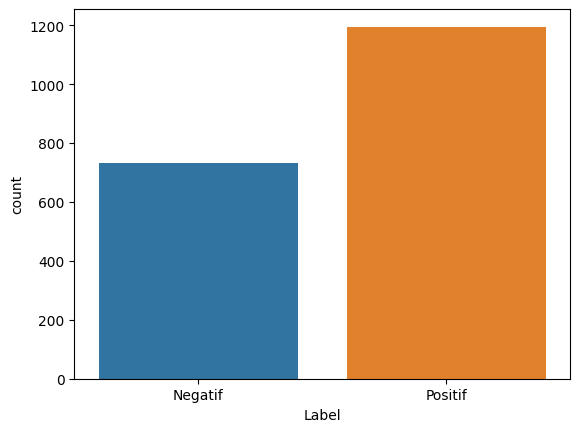

In [ ]:
# import seaborn as sns

sns.countplot(x="Label", data=data6)

(-0.5, 399.5, 199.5, -0.5)

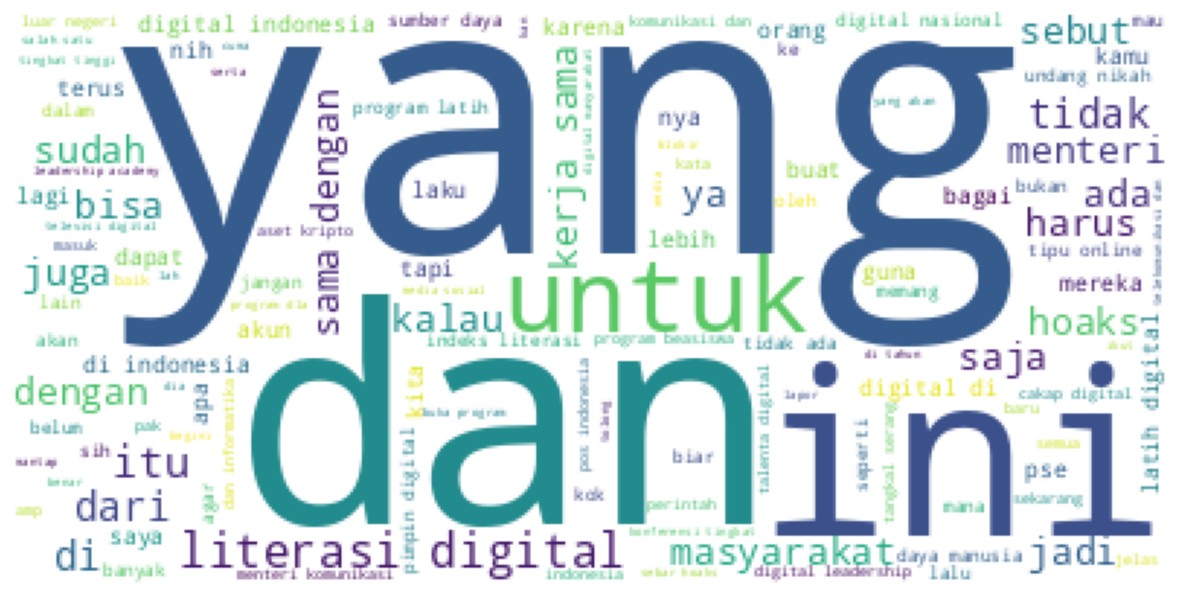

In [ ]:
#Membuat wordcloud untuk kata yang sering muncul
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 10
str_tweet = ' '.join(data6['tweet'].values)
wordcloud = WordCloud(background_color='white', max_words=1000).generate(str_tweet)
plt.imshow(wordcloud)
plt.axis('off')